# Intro

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.pyplot import cm
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ecuacion
## $$ f(x) = x^2 + x + 1 $$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
x_1 = np.linspace(-3,3,100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

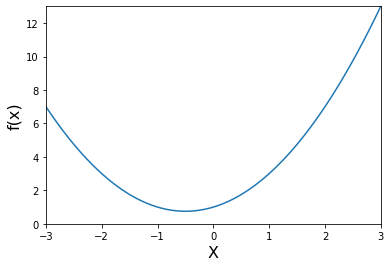

In [4]:
plt.plot(x_1,f(x_1))
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.xlim(-3,3)
plt.ylim(0,13)
plt.show()

# Derivada

In [5]:
def df(x):
    return 2*x + 1

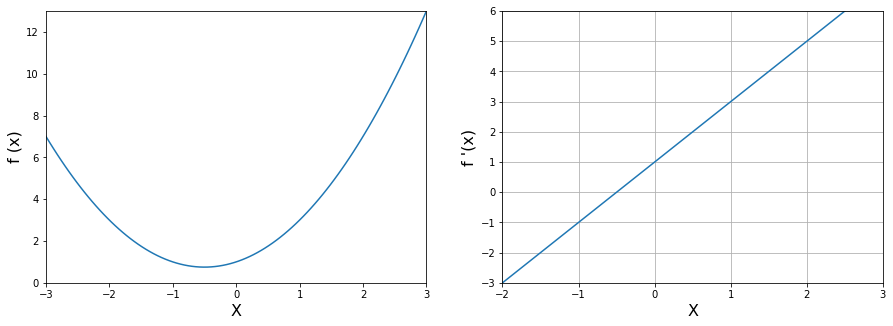

In [6]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.plot(x_1,f(x_1))
plt.xlabel("X", fontsize=16)
plt.ylabel("f (x)", fontsize=16)
plt.xlim(-3,3)
plt.ylim(0,13)

plt.subplot(1,2,2)

plt.plot(x_1,df(x_1))
plt.grid()
plt.xlabel("X", fontsize=16)
plt.ylabel("f \'(x)", fontsize=16)
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.show()

## Gradiente Descendiente

In [7]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.000001
x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradiente = df(previous_x)
    new_x = previous_x - step_multiplier * gradiente
    
    step_size = abs(new_x-previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print("El loop corrio estas veces: ", n)
        break
        
print("Minimo local: ", new_x)
print("Costo en este punto: ",f(new_x))

El loop corrio estas veces:  61
Minimo local:  -0.4999965672099885
Costo en este punto:  0.750000000011784


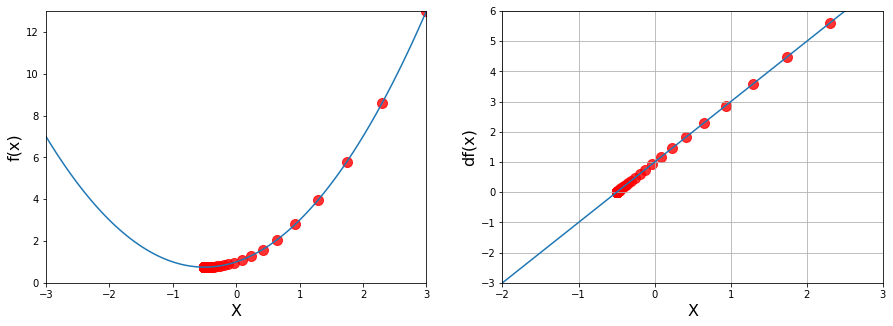

In [8]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.plot(x_1,f(x_1))
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.xlim(-3,3)
plt.ylim(0,13)

values = np.array(x_list)
plt.scatter(values, f(values), color="red", alpha=0.8, s=100)


plt.subplot(1,2,2)

plt.plot(x_1,df(x_1))
plt.grid()
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.xlim(-2,3)
plt.ylim(-3,6)

plt.scatter(x_list, slope_list, color="red", alpha=0.8, s=100)

plt.show()  

## Ejemplo 2 - Multiple Minima vs Initial Guess
## $$ g(x) = x^4 - 4x^2 + 5 $$

In [9]:
x_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4 - 4*(x**2) + 5

def dg(x):
    return 4*(x**3) - 8*x

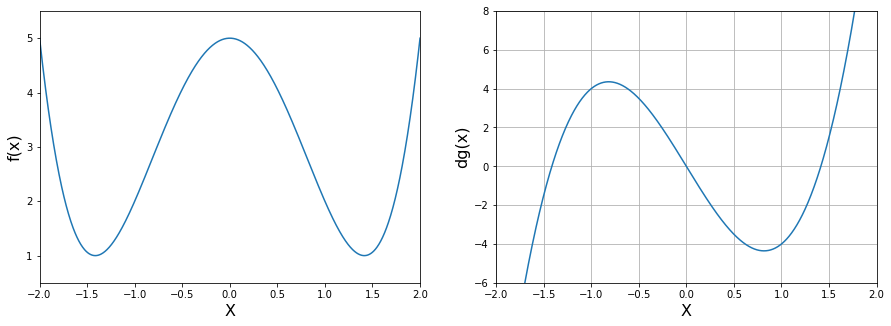

In [10]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.plot(x_2,g(x_2))
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.subplot(1,2,2)

plt.plot(x_2,dg(x_2))
plt.grid()
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.show()

# Gradient Descent as a Python Function

In [11]:
def gradient_descent(derivate_func, initial_guess, multiplier=0.02, precision=0.001, max_iter = 300):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivate_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradiente = derivate_func(previous_x)
        new_x = previous_x - multiplier * gradiente

        step_size = abs(new_x-previous_x)

        x_list.append(new_x)
        slope_list.append(derivate_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [12]:
local_min, list_x, deriv_x = gradient_descent(dg, 0.5, 0.02, 0.001)
print("Minimo local en: ", local_min)
print("Number of steps: ",len(list_x))

Minimo local en:  1.4122375085019094
Number of steps:  23


In [13]:
local_min, list_x, deriv_x = gradient_descent(dg, 0.5)
print("Minimo local en: ", local_min)
print("Number of steps: ",len(list_x))

Minimo local en:  1.4122375085019094
Number of steps:  23


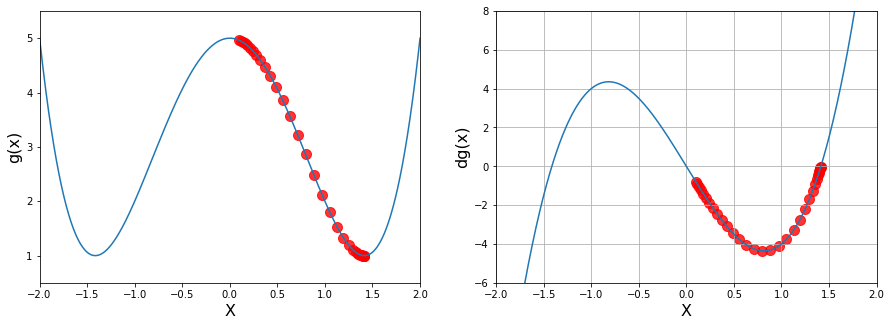

In [14]:
local_min, list_x, deriv_x = gradient_descent(dg, 0.1)

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.plot(x_2,g(x_2))
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)

values = np.array(list_x)
plt.scatter(values, g(values), color="red", alpha=0.8, s=100)


plt.subplot(1,2,2)

plt.plot(x_2,dg(x_2))
plt.grid()
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.scatter(list_x, deriv_x, color="red", alpha=0.8, s=100)

plt.show()  

# Example 3 - Divergencia, Sobreflujo y tuplas de Python
## $$ h(x) = x^5 - 2x^4 + 2 $$

In [15]:
x_3 = np.linspace(-2.5,2.5,1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

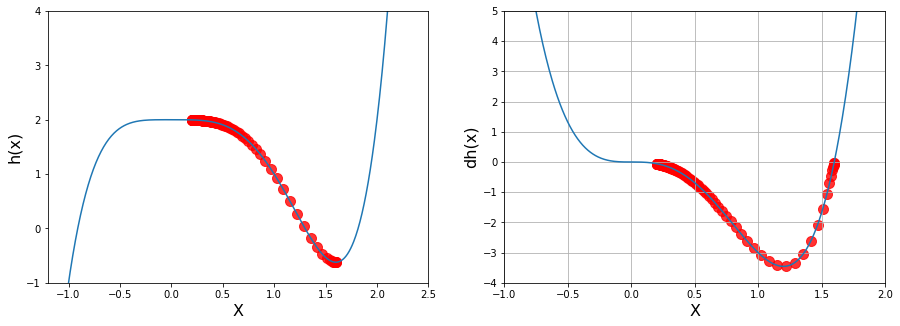

Minimo local en:  1.5989534547394717
Costo:  -0.6214287992331258


In [16]:
local_min, list_x, deriv_x = gradient_descent(dh, 0.2, max_iter=400)

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.plot(x_3,h(x_3))
plt.xlabel("X", fontsize=16)
plt.ylabel("h(x)", fontsize=16)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

values = np.array(list_x)
plt.scatter(values, h(values), color="red", alpha=0.8, s=100)


plt.subplot(1,2,2)

plt.plot(x_3,dh(x_3))
plt.grid()
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.scatter(list_x, deriv_x, color="red", alpha=0.8, s=100)

plt.show()  

print("Minimo local en: ", local_min)
print("Costo: ",h(local_min))

# Python Tuples

In [17]:
tupleex = 'miau','mimi','mew'

tuple_with_single_value = 'Mew',


In [18]:
type(tupleex)

tuple

In [19]:
type(tuple_with_single_value)

tuple

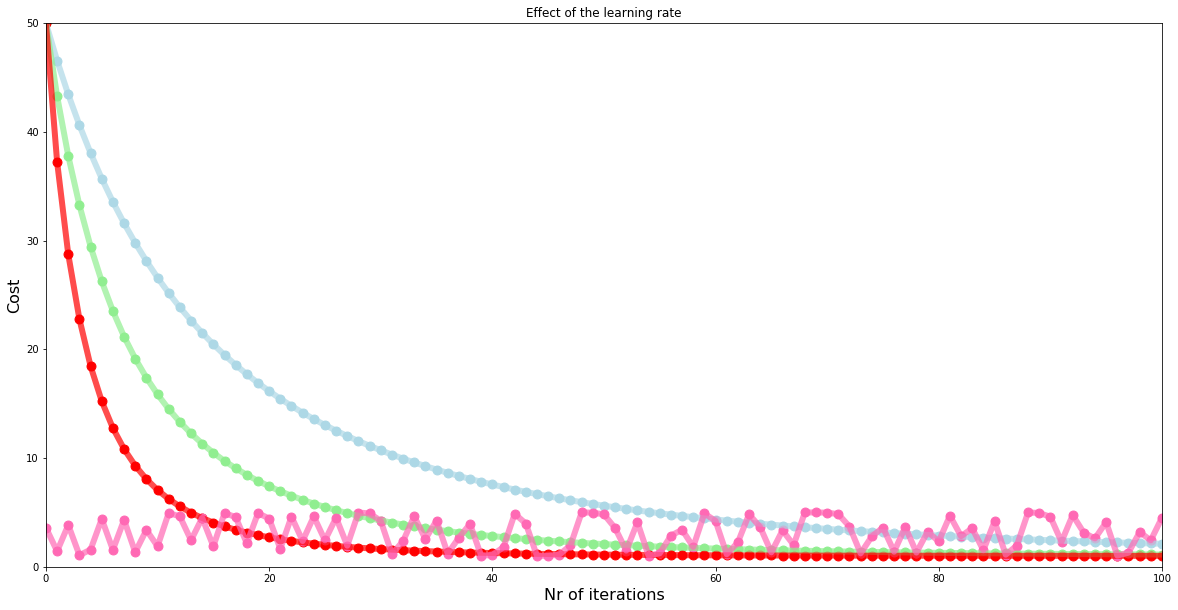

In [20]:
n=100

low_gamma = gradient_descent(dg, 3, multiplier=0.0005,
                                              precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(dg, 3, multiplier=0.001,
                                              precision=0.0001, max_iter=n)

high_gamma = gradient_descent(dg, 3, multiplier=0.002,
                                              precision=0.0001, max_iter=n)

mierdi_gamma = gradient_descent(dg, 1.9, multiplier=0.25,
                                              precision=0.0001, max_iter=n)

plt.figure(figsize=[20,10])

plt.title("Effect of the learning rate")
plt.xlabel("Nr of iterations", fontsize=16)
plt.ylabel("Cost", fontsize=16)
plt.xlim(0,n)
plt.ylim(0,50)

low_values = np.array(low_gamma[1])

mid_values = np.array(mid_gamma[1])

high_values = np.array(high_gamma[1])

mierdi_values = np.array(mierdi_gamma[1])

iteration_list = list(range(0,n+1))

plt.plot(iteration_list, g(low_values), color="lightblue", linewidth=6, alpha=0.7)
plt.scatter(iteration_list, g(low_values), color="lightblue", s=80)

plt.plot(iteration_list, g(mid_values), color="lightgreen", linewidth=6, alpha=0.7)
plt.scatter(iteration_list, g(mid_values), color="lightgreen", s=80)

plt.plot(iteration_list, g(high_values), color="red", linewidth=6, alpha=0.7)
plt.scatter(iteration_list, g(high_values), color="red", s=80)

plt.plot(iteration_list, g(mierdi_values), color="hotpink", linewidth=6, alpha=0.7)
plt.scatter(iteration_list, g(mierdi_values), color="hotpink", s=80)

plt.show()

# Example 4 - Data viz with 3D Charts

## Minimise $$ f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1} $$

In [21]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [22]:
x_4 = np.linspace(start= -2,stop= 2, num = 200)
y_4 = np.linspace(start= -2,stop= 2, num = 200)

x_4, y_4 = np.meshgrid(x_4,y_4)

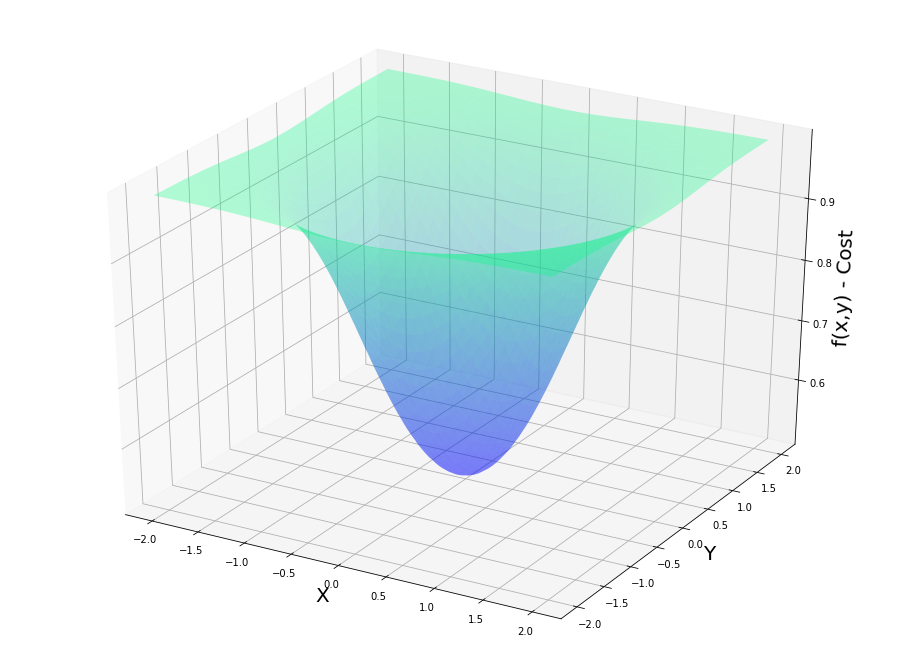

In [23]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection = '3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x,y) - Cost", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap= cm.winter, alpha=0.3)
plt.show()

## Derivadas parciales

In [24]:
a, b = symbols('x, y')
print('Funcion de costo: ', f(a, b))
print('Derivada parcial respecto a x: ',diff(f(a,b), a))

print('Costo en un punto a ', f(a,b).evalf(subs={a: 1.8, b: 1.0}))
print('Pendiente en el punto a ', diff(f(a,b),a).evalf(subs={a: 1.8, b:1.0}))

Funcion de costo:  1/(3**(-x**2 - y**2) + 1)
Derivada parcial respecto a x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Costo en un punto a  0.990604794032582
Pendiente en el punto a  0.0368089716197505


## Gradiente con Batch

In [25]:
multiplier = 0.1
max_iter = 200

params = np.array([1.9, 1.0])

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a : params[0], b : params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a : params[0], b : params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Resultados
print('Values in gradient array', gradients)
print('Minimo ocurre en x : ', params[0])
print('Minimo ocurre en y : ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [0.00194615284519236 0.00102429097115387]
Minimo ocurre en x :  0.00334831403716647
Minimo ocurre en y :  0.00176227054587709
The cost is:  0.500003932154303


In [26]:
def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [27]:
fpx(1.8,1.0)

0.036808971619750504

In [28]:
multiplier = 0.1
max_iter = 200

params = np.array([1.9, 1.0])

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Resultados
print('Values in gradient array', gradients)
print('Minimo ocurre en x : ', params[0])
print('Minimo ocurre en y : ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [0.00194615 0.00102429]
Minimo ocurre en x :  0.0033483140371664646
Minimo ocurre en y :  0.0017622705458770877
The cost is:  0.5000039321543034


## Grafica en 3d

In [29]:
multiplier = 0.1
max_iter = 200

params = np.array([1.9, 1.0])
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
#Resultados
print('Values in gradient array', gradients)
print('Minimo ocurre en x : ', params[0])
print('Minimo ocurre en y : ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00194615 0.00102429]
Minimo ocurre en x :  0.0033483140371664646
Minimo ocurre en y :  0.0017622705458770877
The cost is:  0.5000039321543034


In [30]:
ds_saga = np.array([['Dark Souls 1','Dark Souls 2'],
                    ['Demon Souls','Dark Souls 3']])

print('Mejor Dark Souls es: ', ds_saga[0][0])

fc_games = np.array([['Bloodborne','Sekiro']])
souls_games = np.append(ds_saga,fc_games, axis=0)
souls_games

print('Mejores juegos... ', souls_games[:,0])
print('Juegos decentes... ', souls_games[:,1])

Mejor Dark Souls es:  Dark Souls 1
Mejores juegos...  ['Dark Souls 1' 'Demon Souls' 'Bloodborne']
Juegos decentes...  ['Dark Souls 2' 'Dark Souls 3' 'Sekiro']


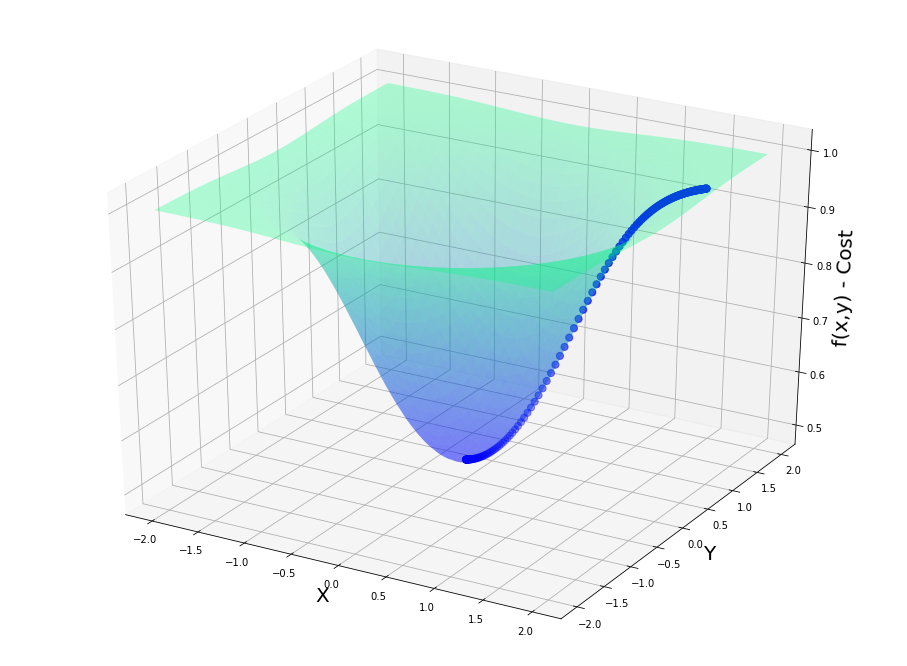

In [31]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection = '3d')

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x,y) - Cost", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap= cm.winter, alpha=0.3)
ax.scatter(values_array[:,0], values_array[:,1],
           f(values_array[:,0], values_array[:,1]), s=50, color='blue')

plt.show()

# Ejemplo 5
## Error medio cuadrado

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [32]:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).transpose()

In [33]:
regr = LinearRegression()
regr.fit(x_5, y_5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

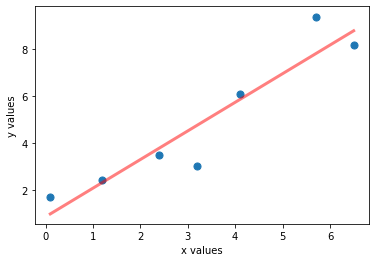

In [34]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), linewidth=3, color='red', alpha=0.5)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [35]:
y_hat = 0.847535148603 + 1.22272646378*x_5
print("Y gorrito:\n", y_hat)
print("Y normal: \n", y_5)


Y gorrito:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Y normal: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [36]:
def mse(y,y_hat):
    return sum((y-y_hat)**2)/len(y)

In [37]:
print("MSE manual: ",mse(y_5,y_hat))
print("MSE automatico: ",mean_squared_error(y_5,regr.predict(x_5)))

MSE manual:  [0.94796558]
MSE automatico:  0.9479655759794575


# 3D Plot para funcion de costo MSE

In [38]:
nr_thetas = 200
th_0 = np.linspace(-1,3, nr_thetas)
th_1 = np.linspace(-1,3, nr_thetas)
plot_0, plot_1 = np.meshgrid(th_0,th_1)

In [39]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_0[i][j] + plot_1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

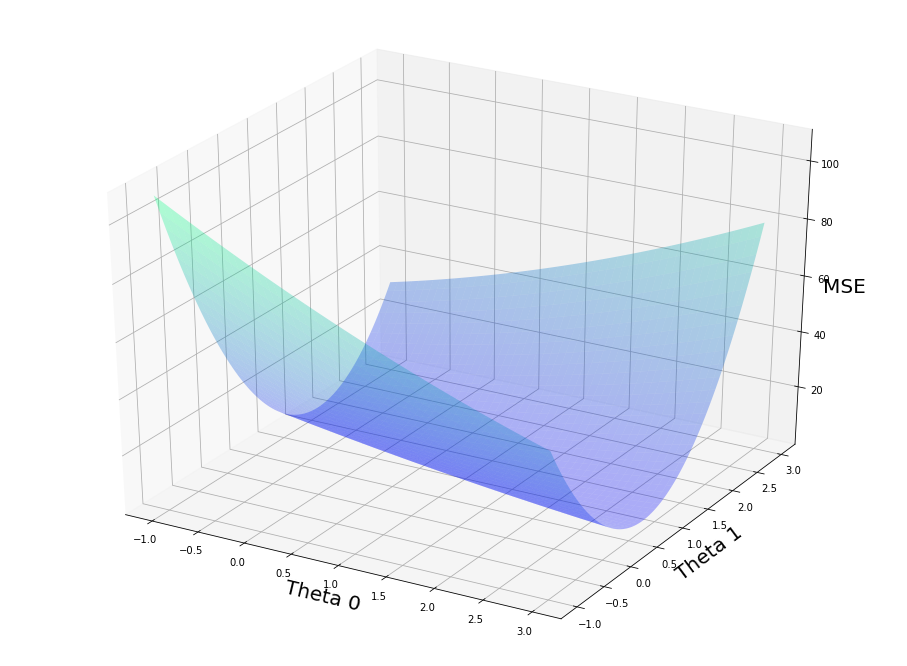

In [40]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection = '3d')

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("MSE", fontsize=20)

ax.plot_surface(plot_0, plot_1, plot_cost, cmap= cm.winter, alpha=0.3)
plt.show()

In [41]:
print('Min value of plot cos: ',plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims= plot_cost.shape)
print('Min occurs at (i,j): ',ij_min)

Min value of plot cos:  0.9483826526747164
Min occurs at (i,j):  (111, 91)


c:\users\usuario\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


# Derivadas parciales de MSE



In [55]:
def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2 / n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2 / n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [57]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr= mse_vals, values=mse(y_5, thetas[0] + thetas[1] *x_5))

print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE : ', mse(y_5, thetas[0] + thetas[1] * x_5))
    

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE :  [0.94797511]


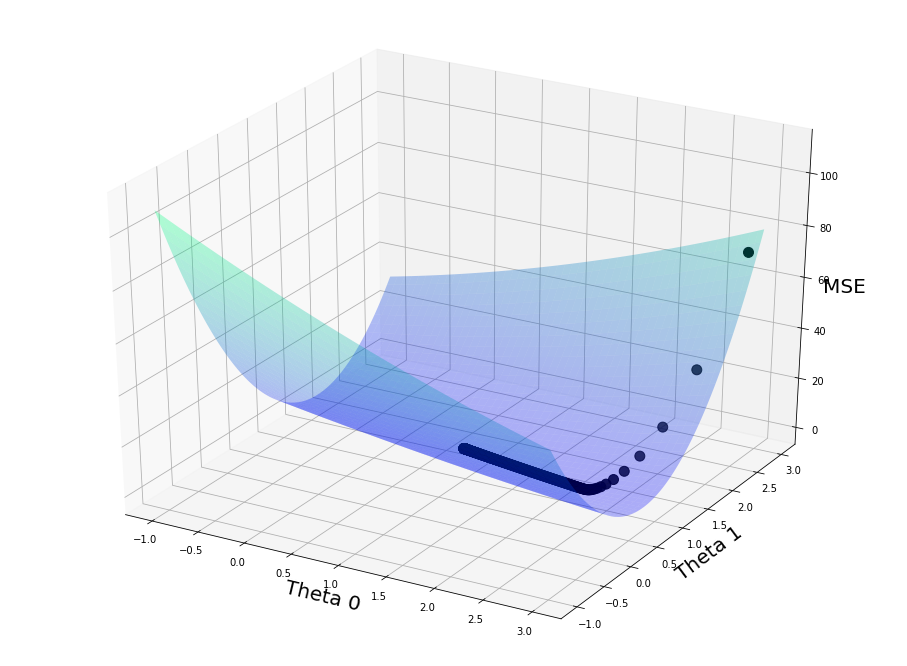

In [62]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection = '3d')

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("MSE", fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals, s=100, color='black')
ax.plot_surface(plot_0, plot_1, plot_cost, cmap= cm.winter, alpha=0.3)
plt.show()